# Diabetic Retinopathy

## Description

The Diabetic Retinopathy (DR) dataset predicts whether an image contains signs of diabetic retinopathy. The dataset contains features that have been extracted frm the [Messidor](https://www.adcis.net/en/third-party/messidor/) image set.

The column attributes are as follows:

| Column Name | Description |
| - | - |
| assessment_quality | Quality of assessment |
| prescreening_result | Pre-screening analysis results |
| mas_alpha_5 | Number of microaneurysms (MA) detected at confidence level alpha=0.5 |
| mas_alpha_6 | Number of microaneurysms (MA) detected at confidence level alpha=0.6 |
| mas_alpha_7 | Number of microaneurysms (MA) detected at confidence level alpha=0.7 |
| mas_alpha_8 | Number of microaneurysms (MA) detected at confidence level alpha=0.8 |
| mas_alpha_9 | Number of microaneurysms (MA) detected at confidence level alpha=0.9 |
| mas_alpha_10 | Number of microaneurysms (MA) detected at confidence level alpha=1.0 |
| exudates_alpha_50 | Number of exudates found at confidence level alpha=0.50 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_57 | Number of exudates found at confidence level alpha≈0.57 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_64 | Number of exudates found at confidence level alpha≈0.64 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_71 | Number of exudates found at confidence level alpha≈0.71 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_79 | Number of exudates found at confidence level alpha≈0.79 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_86 | Number of exudates found at confidence level alpha≈0.86 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_93 | Number of exudates found at confidence level alpha≈0.93 divided by the diameter of the region of interest (ROI) |
| exudates_alpha_100 | Number of exudates found at confidence level alpha=1.00 divided by the diameter of the region of interest (ROI) |
| macula_disc_distance | Euclidean distance of the center of the macula and the center of the optic disct divided by the diameter of the region of  |interest (ROI)
| disc_diameter | Diameter of the optic disc |
| am_fm_result | Binary result from AM/FM-based classification |
| contains_DR | Class label 0 (no signs of diabetic retinopathy) and 1 (contains signs of diabetic retinopathy) |

[Source](https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set)

## Importing the Dataset

In [1]:
import pandas as pd
from scipy.io import arff

column_names = ['assessment_quality',
                'prescreening_result',
                'mas_alpha_5',
                'mas_alpha_6',
                'mas_alpha_7',
                'mas_alpha_8',
                'mas_alpha_9',
                'mas_alpha_10',
                'exudates_alpha_50',
                'exudates_alpha_57',
                'exudates_alpha_64',
                'exudates_alpha_71',
                'exudates_alpha_79',
                'exudates_alpha_86',
                'exudates_alpha_93',
                'exudates_alpha_100',
                'macula_disc_distance',
                'disc_diameter',
                'am_fm_result',
                'contains_DR']
features = column_names[:-1]
target = column_names[-1]

with open("../../datasets/classification/diabetic_retinopathy.arff", "r") as dataset_file:
    raw_data, meta = arff.loadarff(dataset_file)

## Preparing the Dataset

In [2]:
# Convert the raw numpy dataset to a pandas DataFrame. This allows for mixed datatypes within the same multidimensional matrix object.
prepared_data = pd.DataFrame(raw_data.tolist(), columns=column_names)

# Decode integer columns.
prepared_data['assessment_quality'] = prepared_data['assessment_quality'].astype(int)
prepared_data['prescreening_result'] = prepared_data['prescreening_result'].astype(int)
prepared_data['mas_alpha_5'] = prepared_data['mas_alpha_5'].astype(int)
prepared_data['mas_alpha_6'] = prepared_data['mas_alpha_6'].astype(int)
prepared_data['mas_alpha_7'] = prepared_data['mas_alpha_7'].astype(int)
prepared_data['mas_alpha_8'] = prepared_data['mas_alpha_8'].astype(int)
prepared_data['mas_alpha_9'] = prepared_data['mas_alpha_9'].astype(int)
prepared_data['mas_alpha_10'] = prepared_data['mas_alpha_10'].astype(int)
prepared_data['am_fm_result'] = prepared_data['am_fm_result'].astype(int)

# Decode integer target column.
prepared_data['contains_DR'] = prepared_data['contains_DR'].astype(int)

The following block prints the shape and column datatypes of the processed dataset.

In [3]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(1151, 20)
assessment_quality        int64
prescreening_result       int64
mas_alpha_5               int64
mas_alpha_6               int64
mas_alpha_7               int64
mas_alpha_8               int64
mas_alpha_9               int64
mas_alpha_10              int64
exudates_alpha_50       float64
exudates_alpha_57       float64
exudates_alpha_64       float64
exudates_alpha_71       float64
exudates_alpha_79       float64
exudates_alpha_86       float64
exudates_alpha_93       float64
exudates_alpha_100      float64
macula_disc_distance    float64
disc_diameter           float64
am_fm_result              int64
contains_DR               int64
dtype: object


## Preprocessing the Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_full = prepared_data[features].copy()
y_full = prepared_data[target].copy()

# Split the dataset into two parts, one part training, the other, testing and validating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, validating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Classifiers

In [6]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.neural_network
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...


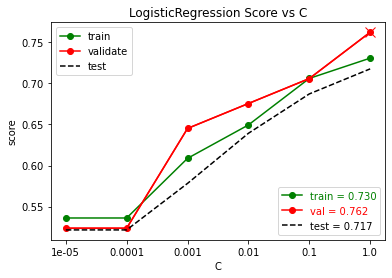

In [7]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(X_train_scaled, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter, adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### SVM Classification

Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0)...


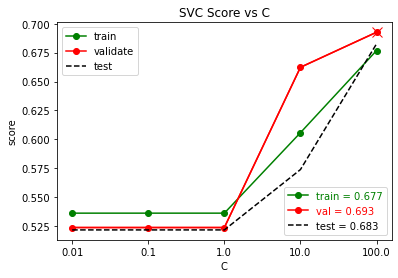

In [8]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...


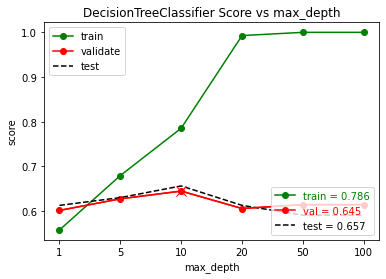

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Random Forest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...


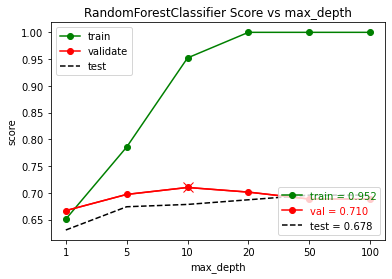

In [10]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### K-Nearest Neighbours Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


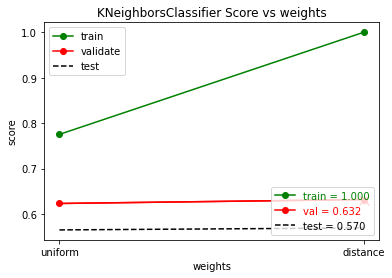

In [11]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


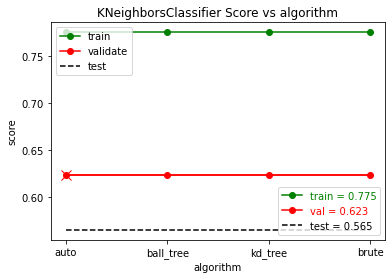

In [12]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...


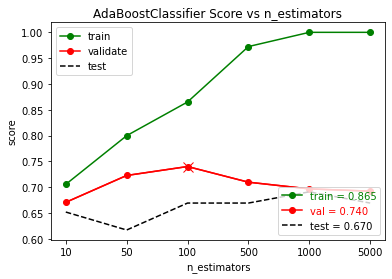

In [13]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Gaussian Naive Bayes Classification

In [14]:
gaussian_nb = sklearn.naive_bayes.GaussianNB()
NaiveBayesEstimator = gaussian_nb.fit(X_train_scaled, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(X_train_scaled, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(X_test_scaled, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(X_val_scaled, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

gaussian_nb_train_score=0.6347826086956522, gaussian_nb_val_score=0.6493506493506493, gaussian_nb_test_score=0.6130434782608696


### Neural Network Classification Through a Multi-Layer Perceptron

In [15]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(X_train_scaled, y_train)

print(f'Training Score: {mlp.score(X_train_scaled, y_train)}')
print(f'Testing Score: {mlp.score(X_test_scaled, y_test)}')
print(f'Validation Score: {mlp.score(X_val_scaled, y_val)}')

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(16), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(X_train_scaled, y_train)

print(f'Training Score: {mlp.score(X_train_scaled, y_train)}')
print(f'Testing Score: {mlp.score(X_test_scaled, y_test)}')
print(f'Validation Score: {mlp.score(X_val_scaled, y_val)}')


Iteration 1, loss = 0.79965545
Iteration 2, loss = 0.74559095
Iteration 3, loss = 0.70550590
Iteration 4, loss = 0.67611915
Iteration 5, loss = 0.65420708
Iteration 6, loss = 0.63967725
Iteration 7, loss = 0.62935702
Iteration 8, loss = 0.62069951
Iteration 9, loss = 0.61473508
Iteration 10, loss = 0.60997169
Iteration 11, loss = 0.60521528
Iteration 12, loss = 0.60134813
Iteration 13, loss = 0.59827803
Iteration 14, loss = 0.59494675
Iteration 15, loss = 0.59228751
Iteration 16, loss = 0.59005424
Iteration 17, loss = 0.58741913
Iteration 18, loss = 0.58566304
Iteration 19, loss = 0.58425491
Iteration 20, loss = 0.58181718
Iteration 21, loss = 0.57954995
Iteration 22, loss = 0.57815904
Iteration 23, loss = 0.57689487
Iteration 24, loss = 0.57513156
Iteration 25, loss = 0.57379393
Iteration 26, loss = 0.57241250
Iteration 27, loss = 0.57128911
Iteration 28, loss = 0.56992434
Iteration 29, loss = 0.56865726
Iteration 30, loss = 0.56770593
Iteration 31, loss = 0.56683327
Iteration 32, los